In [4]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, ConstantKernel
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
import os
import shutil

In [6]:
import pyvisa
#import keyboard
import csv

ImportError: cannot import name 'Self' from 'typing_extensions' (/Users/namkim/opt/anaconda3/envs/testAI_py3x9/lib/python3.9/site-packages/typing_extensions.py)

In [8]:
class Info:
    icase = 6
    icmd = 1
    a0 = -20.
    a1 = 20.
    b0 = -20.
    b1 = 20.
    ndim = 2
    ntrain0 = 36
    nn1 = 200
    nn2 = 200
    tolsig = 1e-3
    models12 = False
    rm = None
    yokogawa = None
    yokogawa2 = None
    multimeter = None
    fname_accum = None

In [13]:
class GP():
    def __init__(self, ndim):
        self.ndim = ndim
        if True:
            #    kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
            self.kernel = ConstantKernel(1.0, constant_value_bounds="fixed") * \
                RBF(1.0, length_scale_bounds="fixed")
        else:
            self.kernel = DotProduct() + WhiteKernel()
        self.gp = GaussianProcessRegressor(
            kernel=self.kernel, n_restarts_optimizer=0)

    def train0(self):
        ntrain1 = 0
        if os.path.isfile(Info.fname_accum):
            afile = open(Info.fname_accum, 'r')
            for line in afile:
                ntrain1 = ntrain1+1
            afile.close()
            X = np.zeros((ntrain1, self.ndim))
            y = np.zeros(ntrain1)
            i = 0
            afile = open(Info.fname_accum, 'r')
            for line in afile:
                for j in range(self.ndim):
                    X[i, j] = float(line.split()[j])
                y[i] = float(line.split()[-1])
                i = i+1
            afile.close()
            self.gp.fit(X, y)
            del X, y, ntrain1, i, j, line

    def predict(self, X_test):
        y_pred, y_std = self.gp.predict(X_test, return_std=True)
        if X_test.shape[0] == 1:
            y_pred = y_pred[0]
            y_std = y_std[0]
        return y_pred, y_std

    def tpredict(self, X_test):
        ntrain01 = 0
        if os.path.isfile(Info.fname_accum):
            afile = open(Info.fname_accum, 'r')
            for line in afile:
                ntrain01 = ntrain01+1
            afile.close()
            X = np.zeros((ntrain01, self.ndim))
            y = np.zeros(ntrain01)
            i = 0
            afile = open(Info.fname_accum, 'r')
            for line in afile:
                for j in range(self.ndim):
                    X[i, j] = float(line.split()[j])
                y[i] = float(line.split()[-1])
                i = i+1
            afile.close()
            ntrain1 = i
            self.gp.fit(X, y)
            del X, y, i, ntrain1, line, ntrain01, j
        y_pred, y_std = self.gp.predict(X_test, return_std=True)
        return y_pred, y_std

In [10]:
class Multi_knn():
    def __init__(self, ndim, models12):
        self.ndim = ndim
        self.models12 = models12
        self.knn4 = KNeighborsRegressor(
            n_neighbors=4, leaf_size=30, p=2,  weights='distance')
        self.knn5 = KNeighborsRegressor(
            n_neighbors=5, leaf_size=30, p=2,  weights='distance')
        self.knn6 = KNeighborsRegressor(
            n_neighbors=6, leaf_size=30, p=2,  weights='distance')
        self.knn7 = KNeighborsRegressor(
            n_neighbors=7, leaf_size=30, p=2,  weights='distance')
        self.knn8 = KNeighborsRegressor(
            n_neighbors=8, leaf_size=30, p=2,  weights='distance')
        self.knn9 = KNeighborsRegressor(
            n_neighbors=9, leaf_size=30, p=2,  weights='distance')
        if models12:
            self.knn41 = KNeighborsRegressor(
                n_neighbors=4, leaf_size=30, p=1.5, weights='distance')
            self.knn51 = KNeighborsRegressor(
                n_neighbors=5, leaf_size=30, p=1.5, weights='distance')
            self.knn61 = KNeighborsRegressor(
                n_neighbors=6, leaf_size=30, p=1.5, weights='distance')
            self.knn71 = KNeighborsRegressor(
                n_neighbors=7, leaf_size=30, p=1.5, weights='distance')
            self.knn81 = KNeighborsRegressor(
                n_neighbors=8, leaf_size=30, p=1.5, weights='distance')
            self.knn91 = KNeighborsRegressor(
                n_neighbors=9, leaf_size=30, p=1.5, weights='distance')

    def train0(self):
        ntrain1 = 0
        if os.path.isfile(Info.fname_accum):
            afile = open(Info.fname_accum, 'r')
            for line in afile:
                ntrain1 = ntrain1+1
            afile.close()
            X = np.zeros((ntrain1, self.ndim))
            y = np.zeros(ntrain1)
            i = 0
            afile = open(Info.fname_accum, 'r')
            for line in afile:
                for j in range(self.ndim):
                    X[i, j] = float(line.split()[j])
                y[i] = float(line.split()[-1])
                i = i+1
            afile.close()
            self.knn4.fit(X, y)
            self.knn5.fit(X, y)
            self.knn6.fit(X, y)
            self.knn7.fit(X, y)
            self.knn8.fit(X, y)
            self.knn9.fit(X, y)
            if self.models12:
                self.knn41.fit(X, y)
                self.knn51.fit(X, y)
                self.knn61.fit(X, y)
                self.knn71.fit(X, y)
                self.knn81.fit(X, y)
                self.knn91.fit(X, y)
            del X, y, ntrain1, i, j, line

    def predict(self, X_test):
        anarray = []
        ypred = self.knn4.predict(X_test)
        anarray.append(ypred)
        ypred = self.knn5.predict(X_test)
        anarray.append(ypred)
        ypred = self.knn6.predict(X_test)
        anarray.append(ypred)
        ypred = self.knn7.predict(X_test)
        anarray.append(ypred)
        ypred = self.knn8.predict(X_test)
        anarray.append(ypred)
        ypred = self.knn9.predict(X_test)
        anarray.append(ypred)
        if self.models12:
            ypred = self.knn41.predict(X_test)
            anarray.append(ypred)
            ypred = self.knn51.predict(X_test)
            anarray.append(ypred)
            ypred = self.knn61.predict(X_test)
            anarray.append(ypred)
            ypred = self.knn71.predict(X_test)
            anarray.append(ypred)
            ypred = self.knn81.predict(X_test)
            anarray.append(ypred)
            ypred = self.knn91.predict(X_test)
            anarray.append(ypred)
        anarray = np.array(anarray)
        return np.mean(anarray), np.std(anarray)

    def tpredict(self, X_test):
        ntrain01 = 0
        if os.path.isfile(Info.fname_accum):
            afile = open(Info.fname_accum, 'r')
            for line in afile:
                ntrain01 = ntrain01+1
            afile.close()
            X = np.zeros((ntrain01, self.ndim))
            y = np.zeros(ntrain01)
            i = 0
            afile = open(Info.fname_accum, 'r')
            for line in afile:
                for j in range(self.ndim):
                    X[i, j] = float(line.split()[j])
                y[i] = float(line.split()[-1])
                i = i+1
            afile.close()
            ntrain1 = i
            self.knn4.fit(X, y)
            self.knn5.fit(X, y)
            self.knn6.fit(X, y)
            self.knn7.fit(X, y)
            self.knn8.fit(X, y)
            self.knn9.fit(X, y)
            if self.models12:
                self.knn41.fit(X, y)
                self.knn51.fit(X, y)
                self.knn61.fit(X, y)
                self.knn71.fit(X, y)
                self.knn81.fit(X, y)
                self.knn91.fit(X, y)
            del X, y, ntrain1, ntrain01, i, j, line
        anarray = []
        ypred = self.knn4.predict(X_test)
        anarray.append(ypred)
        ypred = self.knn5.predict(X_test)
        anarray.append(ypred)
        ypred = self.knn6.predict(X_test)
        anarray.append(ypred)
        ypred = self.knn7.predict(X_test)
        anarray.append(ypred)
        ypred = self.knn8.predict(X_test)
        anarray.append(ypred)
        ypred = self.knn9.predict(X_test)
        anarray.append(ypred)
        if self.models12:
            ypred = self.knn41.predict(X_test)
            anarray.append(ypred)
            ypred = self.knn51.predict(X_test)
            anarray.append(ypred)
            ypred = self.knn61.predict(X_test)
            anarray.append(ypred)
            ypred = self.knn71.predict(X_test)
            anarray.append(ypred)
            ypred = self.knn81.predict(X_test)
            anarray.append(ypred)
            ypred = self.knn91.predict(X_test)
            anarray.append(ypred)
        anarray = np.array(anarray)
        return np.mean(anarray), np.std(anarray)

In [12]:
def append_new_line(file_name, text_to_append):
    with open(file_name, "a+") as file_object:
        file_object.seek(0)
        data = file_object.read(100)
        if len(data) > 0:
            file_object.write("\n")
        file_object.write(text_to_append)


def append_multiple_lines(file_name, lines_to_append):
    with open(file_name, "a+") as file_object:
        appendEOL = False
        file_object.seek(0)
        data = file_object.read(100)
        if len(data) > 0:
            appendEOL = True
        for line in lines_to_append:
            if appendEOL == True:
                file_object.write("\n")
            else:
                appendEOL = True
            file_object.write(line)

In [14]:
def afun(x, y):
    Info.yokogawa.write(f'S{x:0.5f}E')
    Info.yokogawa2.write(f'S{y:0.5f}E')
    time.sleep(0.1)
    tmp = float(Info.multimeter.query("READ?"))
    return tmp

In [16]:
def driver1(jter):
    print(Info.ndim, ' dimensions')
    if Info.ndim == 2:
        print(Info.a0, Info.a1, Info.b0, Info.b1, ' boundary parameters')
        print(Info.nn1, Info.nn2, Info.tolsig, ' n1, n2, tolsig')
    print(Info.ntrain0, ' initial points')

    start = time.time()
    if Info.ndim == 2:
        a0 = Info.a0
        a1 = Info.a1
        b0 = Info.b0
        b1 = Info.b1
        nn1 = Info.nn1
        nn2 = Info.nn2
        itest = np.zeros((nn1, nn2))

    ndim = Info.ndim
    ntrain0 = Info.ntrain0
    tolsig = Info.tolsig
    models12 = Info.models12
    ntrain = ntrain0

    if os.path.isfile(Info.fname_accum):
        gname = Info.fname_accum[:-4]
        gname = gname+str(np.random.randint(1000000))+'.txt'
        shutil.copyfile(Info.fname_accum, gname)
        os.remove(Info.fname_accum)
    X_train = np.zeros((ntrain0, ndim))
    y_train = np.zeros(ntrain0)
    if ndim == 2:
        alist = []
        blist = []
        iskip = np.sqrt(float(nn1*nn2) / ntrain0)
        iskip = int(iskip)
        if iskip < 1:
            iskip = 1
        i = 0
        for ii in range(0, nn1, iskip):
            for jj in range(0, nn2, iskip):
                if i < ntrain0:
                    alist.append((a1-a0)*float(ii)/float(nn1-1)+a0)
                    blist.append((b1-b0)*float(jj)/float(nn2-1)+b0)
                i = i + 1
        for i in range(ntrain0):
            X_train[i, 0] = alist[i]
            X_train[i, 1] = blist[i]
            y_train[i] = afun(X_train[i, 0], X_train[i, 1])
            lines_to_append = []
            astring = ''
            for j in range(ndim):
                astring = astring+' '+str(X_train[i, j])
            astring = astring+' '+str(y_train[i])
            lines_to_append.append(astring)
            append_multiple_lines(Info.fname_accum, lines_to_append)
        print('coarse', ntrain0)
    else:
        print('not yet')
        for i in range(ntrain0):
            for j in range(ndim):
                X_train[i, j] = np.random.random()
            y_train[i] = 1.

    if Info.icmd == 1:
        multi = Multi_knn(ndim, models12)
        if models12:
            print('Multi_knn', 12)
        else:
            print('Multi_knn', 6)
    else:
        multi = GP(ndim)
        print('GP')
    multi.train0()
    print('train0: the first training')
    X_test = np.zeros((1, ndim))
    for iskip in range(33, 1, -1):
        for ii in range(0, nn1, iskip):
            alist = []
            for jj in range(0, nn2, iskip):
                alist.append(jj)
            if ii % 2 == 1:
                alist.reverse()
            for jj in alist:
                if ndim == 2:
                    X_test[0, 0] = (a1-a0)*float(ii)/float(nn1-1)+a0
                    X_test[0, 1] = (b1-b0)*float(jj)/float(nn2-1)+b0
                    y_pred, y_std = multi.predict(X_test)
                else:
                    print('not yet')
                if y_std < tolsig:
                    tmp = y_pred
                else:
                    itest[ii, jj] = 1.
                    ntrain = ntrain + 1
                    tmp = afun(X_test[0, 0], X_test[0, 1])
                    lines_to_append = []
                    astring = ''
                    for j in range(ndim):
                        astring = astring+' '+str(X_test[0, j])
                    astring = astring+' '+str(tmp)
                    lines_to_append.append(astring)
                    append_multiple_lines(Info.fname_accum, lines_to_append)
                    y_pred, y_std = multi.tpredict(X_test)
    print(ntrain, nn1*nn2, float(ntrain)/float(nn1*nn2))
    if True:
        mm1 = nn1*1
        mm2 = nn2*1
        mm1 = int(mm1)
        mm2 = int(mm2)
    print(ntrain, mm1*mm2, float(ntrain)/float(mm1*mm2))
    b = np.arange(a0, a1, (a1-a0)/mm1)
    d = np.arange(b0, b1, (b1-b0)/mm2)
    B, D = np.meshgrid(b, d)
    n, m = B.shape
    print(n, m)
    nu = np.zeros((n, m))
    st = np.zeros((n, m))
    X_test = np.zeros((1, ndim))
    for i in range(n):
        for j in range(m):
            X_test[0, 0] = B[i, j]
            X_test[0, 1] = D[i, j]
            y_pred, y_std = multi.predict(X_test)
            nu[i, j] = y_pred
            st[i, j] = y_std
    end = time.time()
    print(end - start, (end-start)/60.)
    if True:
        gname = Info.fname_accum[:-4] + '.npy'
        with open(gname, 'wb') as afile:
            np.save(afile, nu)
            np.save(afile, st)

    start = time.time()
    fig = plt.figure(figsize=(12, 12))
    #ax = Axes3D(fig)
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(B, D, nu)
    plt.xlabel('$V_1$ (V)', fontsize=22, labelpad=10)
    plt.ylabel('$V_2$ (V)', fontsize=22, labelpad=10)
    ax.set_zlabel('Current (10nA)', fontsize=22, rotation=0, labelpad=16)
    plt.savefig('mean_' + str(jter) + '.pdf')
    plt.show()
    plt.close()

    fig = plt.figure(figsize=(12, 12))
    #ax = Axes3D(fig)
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(B, D, st)
    plt.xlabel('$V_1$ (V)', fontsize=22, labelpad=10)
    plt.ylabel('$V_2$ (V)', fontsize=22, labelpad=10)
    ax.set_zlabel('Std. Dev. in Current (10nA)',
                  fontsize=18, rotation=0, labelpad=14)
    plt.savefig('std_' + str(jter) + '.pdf')
    plt.show()
    plt.close()

    fig = plt.figure(figsize=(12, 12))
    #ax = Axes3D(fig)
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(B, D, nu)
    ax.view_init(elev=10., azim=100.)
    plt.xlabel('$V_1$ (V)', fontsize=22, labelpad=10)
    plt.ylabel('$V_2$ (V)', fontsize=22, labelpad=10)
    ax.set_zlabel('Current (10nA)', fontsize=22, rotation=0, labelpad=16)
    plt.savefig('mean1_' + str(jter) + '.pdf')
    plt.show()
    plt.close()

    fig = plt.figure(figsize=(12, 12))
    #ax = Axes3D(fig)
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(B, D, st)
    ax.view_init(elev=10., azim=100.)
    plt.xlabel('$V_1$ (V)', fontsize=22, labelpad=10)
    plt.ylabel('$V_2$ (V)', fontsize=22, labelpad=10)
    ax.set_zlabel('Std. Dev. in Current (10nA)',
                  fontsize=22, rotation=0, labelpad=16)
    plt.savefig('std1_' + str(jter) + '.pdf')
    plt.show()
    plt.close()

    result = st.flatten()
    fig = plt.figure(figsize=(12, 8))
    plt.rcParams["xtick.minor.visible"] = True
    plt.rcParams["ytick.minor.visible"] = True
    plt.rcParams['xtick.labelsize'] = 16
    plt.rcParams['ytick.labelsize'] = 16
    plt.hist(result, bins=25, color='skyblue', edgecolor='black')
    plt.xlabel('Standard deviation', fontsize=22)
    plt.ylabel('Frequency (arb. unit)', fontsize=22)
    plt.yscale('log')
    plt.xticks(fontsize=16)
#    plt.yticks(fontsize=19, rotation=0)
#    plt.tick_params(axis='both', which='major', labelsize=12)
#    plt.rc('xtick',labelsize=18)
#    plt.rc('ytick',labelsize=22)
    plt.tight_layout()
    plt.savefig('sig_dist_knn_' + str(jter) + '.pdf')
    plt.show()
    plt.close()
    print(np.mean(result), np.std(result))

    plt.figure(figsize=(8, 8))
    ax = plt.gca()
    ax.set_aspect(1.)
    coords = np.argwhere(itest == 1)
    plt.xlim(0, mm1)
    plt.ylim(0, mm2)
    plt.scatter(coords[:, 0], coords[:, 1], s=0.1,
                facecolors='none', edgecolors='r')
    plt.tight_layout()
    plt.savefig('sampled_knn_' + str(jter) +   '.pdf')
    plt.show()
    plt.close()
    plt.rcParams['xtick.labelsize'] = 12
    plt.rcParams['ytick.labelsize'] = 12

    fig = plt.figure(figsize=(12, 12))
    #ax = Axes3D(fig)
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(B, D, nu)
    ax.view_init(elev=15., azim=120.)
    plt.xlabel('$V_1$ (V)', fontsize=22, labelpad=10)
    plt.ylabel('$V_2$ (V)', fontsize=22, labelpad=10)
    ax.set_zlabel('Current (10nA)', fontsize=22, rotation=0, labelpad=16)
    plt.savefig('mean2_' + str(jter) + '.pdf')
    plt.show()
    plt.close()

    fig = plt.figure(figsize=(12, 12))
    #ax = Axes3D(fig)
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(B, D, st)
    ax.view_init(elev=15., azim=120.)
    plt.xlabel('$V_1$ (V)', fontsize=22, labelpad=10)
    plt.ylabel('$V_2$ (V)', fontsize=22, labelpad=10)
    ax.set_zlabel('Std. Dev. in Current (10nA)',
                  fontsize=22, rotation=0, labelpad=16)
    plt.savefig('std2_' + str(jter) + '.pdf')
    plt.show()
    plt.close()

    fig, ax = plt.subplots()
    CS = ax.contour(B, D, nu)
    ax.clabel(CS, inline=True, fontsize=10)
    ax.set_aspect('equal', 'box')
    #ax.set_title('Simplest default with labels')
    plt.tight_layout()
    plt.savefig('mean_c_' + str(jter) + '.pdf')
    plt.show()
    plt.close()

    fig, ax = plt.subplots()
    CS = ax.contour(B, D, st)
    ax.clabel(CS, inline=True, fontsize=10)
    ax.set_aspect('equal', 'box')
    #ax.set_title('Simplest default with labels')
    plt.tight_layout()
    plt.savefig('std_c_' + str(jter) + '.pdf')
    plt.show()
    plt.close()

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
    ax1.set_aspect('equal', 'box')
    ax2.set_aspect('equal', 'box')
    amax = np.max(nu)
    amin = np.min(nu)
    print(amin, amax)
    tmz = (amax-amin)/10.
    ax1.contourf(nu, levels=np.arange(amin, amax, tmz),
                 extend='both', origin="lower")
    amax = np.max(st)
    amin = np.min(st)
    print(amin, amax)
    tmz = (amax-amin)/10.
    ax2.contourf(st, levels=np.arange(amin, amax, tmz),
                 extend='both', origin="lower")
    plt.savefig('mean_std_' + str(jter) + '.pdf')
    plt.show()
    plt.close()
    end = time.time()
    print(end - start, (end-start)/60.)

In [ ]:
for jter in range(20):
    Info.icmd = 1
    fname_accum = 'accum_'+str(jter)+'.txt'
    Info.fname_accum = fname_accum
    Info.a0 = -20.
    Info.a1 = 20.
    Info.b0 = -20.
    Info.b1 = 20.
    Info.tolsig = 1e-3

    if True:
        Info.a0 = -0.4
        Info.a1 = -0.0
        Info.b0 = -0.4
        Info.b1 = -0.

    Info.ntrain0 = 36
    Info.nn1 = 200
    Info.nn2 = 200

    if True:
        Info.rm = pyvisa.ResourceManager()
        print(Info.rm.list_resources())
        Info.yokogawa = Info.rm.open_resource(
            "GPIB0::11::INSTR", write_termination='\n', read_termination='\n')
        Info.multimeter = Info.rm.open_resource(
            "GPIB0::22::INSTR", write_termination='\n', read_termination='\n')
        Info.yokogawa2 = Info.rm.open_resource(
            "GPIB0::7::INSTR", write_termination='\n', read_termination='\n')
        Info.yokogawa.write("F1R5O1E")
        Info.yokogawa2.write("F1R5O1E")
    driver1(jter)
    

In [18]:
if Info.ndim == 2:
    a0 = Info.a0
    a1 = Info.a1
    b0 = Info.b0
    b1 = Info.b1
b = np.arange(a0, a1, (a1-a0)/(Info.nn1))
d = np.arange(b0, b1, (b1-b0)/(Info.nn2))

In [20]:
nuarray = np.zeros((20, 200, 200))
for jter in range(20):
    fname_accum = '/Users/namkim/Library/CloudStorage/Dropbox/실험일지/2025 실험/4K JSLee/20250207 acuum(iter=20)/accum_'+str(jter)+'.txt'
    Info.fname_accum = fname_accum
    if True:
        gname = Info.fname_accum[:-4] + '.npy'
        with open(gname, 'rb') as afile:
            nu = np.load(afile)
            st = np.load(afile)
        nuarray[jter, :, :] = nu[:, :]

In [22]:
etam = np.zeros(20)
for jter in range(20):
    fname_accum = '/Users/namkim/Library/CloudStorage/Dropbox/실험일지/2025 실험/4K JSLee/20250207 acuum(iter=20)/accum_'+str(jter)+'.txt'
    x = []
    y = []
    z = []
    afile = open(fname_accum, 'r')
    for line in afile:
        x.append(float(line.split()[0]))
        y.append(float(line.split()[1]))
        z.append(float(line.split()[2]))
    afile.close()
    Info.fname_accum = fname_accum
    etam[jter] = 0.
    count = 0.
    for k in range(len(z)):
        for i0 in range(200):
            if np.abs(x[k]-b[i0]) < 1e-3:
                for j0 in range(200):
                    if np.abs(y[k]-d[j0]) < 1e-3:
                        etam[jter] = etam[jter] + (z[k]-nuarray[0, i0, j0])**2
                        count = count+1.

In [23]:
np.sqrt(np.sum(etam))/count/20.

0.5401784706129804

In [26]:
etap = np.zeros(20)
for jter in range(20):
    fname_accum = '/Users/namkim/Library/CloudStorage/Dropbox/실험일지/2025 실험/4K JSLee/20250207 acuum(iter=20)/accum_'+str(jter)+'.txt'
    Info.fname_accum = fname_accum
    etap[jter] = 0.
    count = 0.
    for i0 in range(200):
        for j0 in range(200):
            etap[jter] = etap[jter] + \
                (nuarray[jter, i0, j0]-nuarray[0, i0, j0])**2
            count = count+1.

In [28]:
np.sqrt(np.sum(etap))/count/20.

5.637089469457365e-05

In [58]:
etamm = np.zeros(20)
jter = 0
fname_accum0 = '/Users/namkim/Library/CloudStorage/Dropbox/실험일지/2025 실험/4K JSLee/20250207 acuum(iter=20)/accum_'+str(jter)+'.txt'
if jter == 0:
    x0 = []
    y0 = []
    z0 = []
    afile = open(fname_accum0, 'r')
    for line in afile:
        x0.append(float(line.split()[0]))
        y0.append(float(line.split()[1]))
        z0.append(float(line.split()[2]))
    afile.close()
for jter in range(20):
    fname_accum = '/Users/namkim/Library/CloudStorage/Dropbox/실험일지/2025 실험/4K JSLee/20250207 acuum(iter=20)/accum_'+str(jter)+'.txt'
    x = []
    y = []
    z = []
    afile = open(fname_accum, 'r')
    for line in afile:
        x.append(float(line.split()[0]))
        y.append(float(line.split()[1]))
        z.append(float(line.split()[2]))
    afile.close()
    Info.fname_accum = fname_accum
    etamm[jter] = 0.
    count = 0.
    for k in range(len(z)):
        for i0 in range(len(x0)):
            if np.abs(x[k]-x0[i0]) < 5e-1:
                for j0 in range(len(y0)):
                    if np.abs(y[k]-y0[j0]) < 5e-1:
                        etamm[jter] = etamm[jter] + (z[k]-z0[k])**2
                        count = count+1.

KeyboardInterrupt: 

In [ ]:
np.sqrt(np.sum(etamm))/count/20.

In [34]:
etapm = np.zeros(20)
for jter in range(20):
    fname_accum = '/Users/namkim/Library/CloudStorage/Dropbox/실험일지/2025 실험/4K JSLee/20250207 acuum(iter=20)/accum_'+str(jter)+'.txt'
    Info.fname_accum = fname_accum
    etapm[jter] = 0.
    count = 0.
    for i0 in range(200):
        for j0 in range(200):
            etapm[jter] = etapm[jter] + (nuarray[jter, i0, j0]-z[0])**2
            count = count+1.

In [36]:
np.sqrt(np.sum(etapm))/count/20.

0.0024715322868976482

I-<I> calculation

zbar
nubar

In [38]:
nusumi0j0 = np.zeros(20)
i0=10
j0=10
for jter in range(20):
    fname_accum = '/Users/namkim/Library/CloudStorage/Dropbox/실험일지/2025 실험/4K JSLee/20250207 acuum(iter=20)/accum_'+str(jter)+'.txt'
    Info.fname_accum = fname_accum
    nusumi0j0[jter] = 0.
    count = 0.
    nusumi0j0[jter] = nusumi0j0[jter] + nuarray[jter, i0, j0]
    count = count+1.
nui0j0bar=np.sum(nusumi0j0)/20
print(nui0j0bar)

-3.0803326712204453


In [40]:
np.sum(nusumi0j0)

-61.606653424408904

In [42]:
nusum = np.zeros(20)
for jter in range(20):
    fname_accum = '/Users/namkim/Library/CloudStorage/Dropbox/실험일지/2025 실험/4K JSLee/20250207 acuum(iter=20)/accum_'+str(jter)+'.txt'
    Info.fname_accum = fname_accum
    nusum[jter] = 0.
    count = 0.
    for i0 in range(200):
        for j0 in range(200):
            nusum[jter] = nusum[jter] + nuarray[jter, i0, j0]
            count = count+1.
total_sum = np.sum(nusum)
print(total_sum)

-1119920.4963292254


In [44]:
np.sum(nusum)

-1119920.4963292254

In [107]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, ConstantKernel
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
import os
import shutil

In [97]:
nexp = 3
xyz = np.zeros((nexp, 200, 200))
for jter in range(nexp):
    fname_accum = 'data_iv_' + str(jter+1) + '.txt'
    x = []
    y = []
    z = []
    afile = open(fname_accum, 'r')
    for line in afile:
        y.append(float(line.split()[0]))
        x.append(float(line.split()[1]))
        z.append(float(line.split()[2]))
    afile.close()
    z = np.array(z)
    x = np.array(x)
    y = np.array(y)
    xx = np.zeros((200, 200))
    yy = np.zeros((200, 200))
    zz = np.zeros((200, 200))
    k = 0
    for i in range(200):
        for j in range(200):
            xx[i, j] = x[k]
            yy[i, j] = y[k]
            zz[i, j] = z[k]
            k = k+1
    if False:
        print(len(z))
    xyz[jter, :, :] = xx[:, :]
    xyz[jter, :, :] = yy[:, :]
    xyz[jter, :, :] = zz[:, :]

In [98]:
zavgexp = np.zeros((200, 200))
for i in range(200):
    for j in range(200):
        zavgexp[i, j] = sum(xyz[:, i, j])/nexp

In [99]:
tmp = np.zeros((nexp, 200, 200))
for iexp in range(nexp):
    tmp[iexp, :, :] = ((xyz[iexp, :, :]-zavgexp[:, :]))**2

In [100]:
savgexp = np.zeros((200, 200))
for i in range(200):
    for j in range(200):
        savgexp[i, j] = np.sqrt(sum(tmp[:, i, j])/nexp)

In [101]:
nuarray = np.zeros((nexp, 200, 200))
for iexp in range(nexp):
    fname_accum = r'C:\Users\Inho Lee\testAI\data_kn(ts=0.3)_20250211'+'/accum_'+str(jter)+'.npy'
    with open(fname_accum, 'rb') as afile:
        nu = np.load(afile)
        st = np.load(afile)
        nuarray[iexp, :, :] = nu[:, :]

In [102]:
nuavexp = np.zeros((200, 200))
for i in range(200):
    for j in range(200):
        nuavexp[i, j] = sum(nuarray[:, i, j])/nexp

In [103]:
tmp = np.zeros((nexp, 200, 200))
for iexp in range(nexp):
    tmp[iexp, :, :] = ((nuarray[iexp, :, :]-zavgexp[:, :]))**2

In [104]:
spm = np.zeros((200, 200))
for i in range(200):
    for j in range(200):
        spm[i, j] = np.sqrt(
            sum(((tmp[:, i, j]-zavgexp[i, j]))**2)/nexp)

In [105]:
print(spm)

[[3.14348624e+00 2.99757358e+00 2.82402323e+00 ... 4.75997845e-04
  4.71662503e-04 4.77659960e-04]
 [3.33493363e+00 3.24251466e+00 3.20716601e+00 ... 4.78664747e-04
  4.72329293e-04 4.73326503e-04]
 [3.33839727e+00 3.23395628e+00 3.19196164e+00 ... 4.73664297e-04
  4.67994899e-04 4.76327486e-04]
 ...
 [4.80688552e+00 4.73912349e+00 4.88924574e+00 ... 4.74663727e-04
  4.76329839e-04 4.77328750e-04]
 [4.80160941e+00 4.76633157e+00 4.87687825e+00 ... 4.75997175e-04
  4.74996270e-04 4.77328332e-04]
 [4.82744526e+00 4.78709599e+00 4.92272622e+00 ... 4.76330525e-04
  4.78663338e-04 4.78327962e-04]]


In [106]:
asum = 0.
for i in range(200):
    for j in range(200):
        asum = asum+spm[i, j]
print(asum/200./200.)

1.231837368115149


In [108]:
mm1 = 200
mm2 = 200
a0 = 0.0
a1 = -1.0
b0 = 0.3
b1 = 0.5
b = np.arange(a0, a1, (a1-a0)/mm1)
d = np.arange(b0, b1, (b1-b0)/mm2)
B, D = np.meshgrid(b, d)
n, m = B.shape

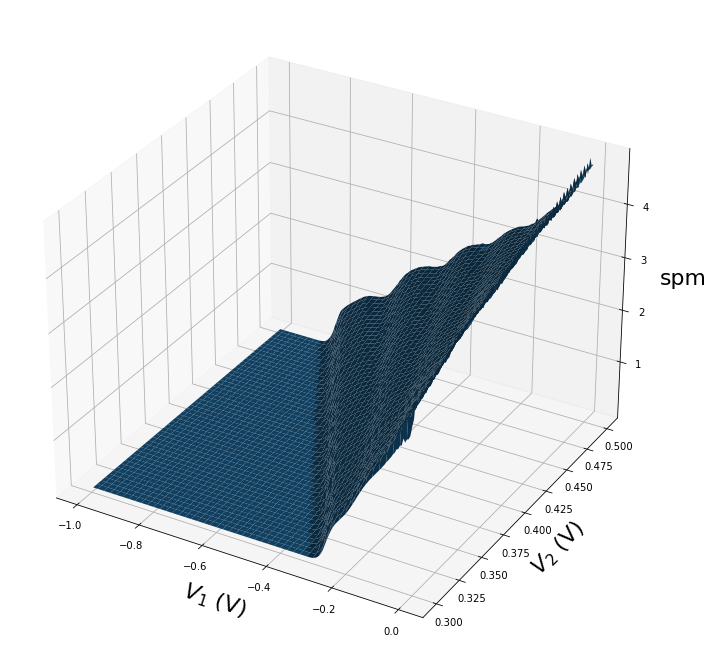

In [109]:
fig = plt.figure(figsize=(12, 12))
#ax = Axes3D(fig)
ax = fig.add_subplot(projection='3d')
ax.plot_surface(B, D, spm)
plt.xlabel('$V_1$ (V)', fontsize=22, labelpad=10)
plt.ylabel('$V_2$ (V)', fontsize=22, labelpad=10)
ax.set_zlabel('spm', fontsize=22, rotation=0, labelpad=16)
plt.savefig('spm_' + str(jter) + '.pdf')
plt.show()
plt.close()

In [64]:
k = 0
for j in range(3):
    for i in range(3):
        abc[i, j] = abc1vec[k]
        k = k+1
print(abc)        

[[0. 3. 6.]
 [1. 4. 7.]
 [2. 5. 8.]]
